#### Packages Required

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

#### Loading data

In [93]:
claims=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv')
cust_demo=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

#### Meta data  inspection

In [94]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [95]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [96]:
cust_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [97]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


##### 1. Import claims_data.csv and cust_data.csv which is provided to you andcombine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [98]:
# Joining data
df=pd.merge(left=claims,right=cust_demo,left_on='customer_id',right_on='CUST_ID',how = 'inner')

In [99]:
df.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


#### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance. 

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [101]:
# Data type conversion to object type:
df.claim_id=df.claim_id.astype(object)
df.customer_id=df.customer_id.astype(object)

In [102]:
# Handling Dates
df.claim_date=pd.to_datetime(df.claim_date,format='%m/%d/%Y')

In [103]:
df.DateOfBirth=pd.to_datetime(df.DateOfBirth,format='%d-%b-%y')

##### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the  $ sign.

In [104]:
# Removing $ symbol and then typecasting it to numeric:
df.claim_amount=pd.to_numeric(df.claim_amount.str.replace('$',''))

##### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


In [105]:
df['Police_alert']=pd.Series(np.where((df.claim_type.str.contains('Injury',case=False))&(df.police_report.isin(['No','Unknown'])),'1','0' ))

##### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [89]:
df=df.sort_values(by='claim_date')[~df.duplicated(subset='customer_id',keep='last')]

##### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 739 to 1055
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1078 non-null   object        
 1   customer_id          1078 non-null   object        
 2   incident_cause       1078 non-null   object        
 3   claim_date           1078 non-null   datetime64[ns]
 4   claim_area           1078 non-null   object        
 5   police_report        1078 non-null   object        
 6   claim_type           1078 non-null   object        
 7   claim_amount         1013 non-null   float64       
 8   total_policy_claims  1068 non-null   float64       
 9   fraudulent           1078 non-null   object        
 10  CUST_ID              1078 non-null   int64         
 11  gender               1078 non-null   object        
 12  DateOfBirth          1078 non-null   datetime64[ns]
 13  State                1078 non-n

In [86]:
# Mean value imputation for claim_amount:
df.claim_amount.fillna(df.claim_amount.mean(),inplace=True) 

In [87]:
# Mode value imputation for total_policy_claims  :

In [88]:
df.total_policy_claims.fillna(df.total_policy_claims.mode()[0],inplace=True)

#### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
        Children < 18
        Youth 18-30
        Adult 30-60
        Senior > 60

In [89]:
# getting correct Date of birth
df['DOB'] = pd.Series(np.where(df.DateOfBirth.dt.year>2000,df.DateOfBirth+pd.DateOffset(years=-100),df.DateOfBirth))
#removing incorrect dob col
df.drop(columns='DateOfBirth')

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,State,Contact,Segment,Police_alert,DOB
739,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,29323970,Male,NE,783-653-9163,Gold,0,1996-09-22
181,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,61745840,Female,MA,612-684-5472,Platinum,1,1979-02-06
312,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,65176092,Male,NC,651-379-2486,Silver,1,1982-06-11
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,42664554,Female,TN,396-973-2531,Gold,1,1969-04-23
120,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,39587790,Male,LA,615-154-3516,Gold,0,1991-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,38011078,Female,NE,271-123-1475,Gold,0,1965-03-17
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,93915431,Male,ME,134-785-1687,Gold,1,1969-12-25
226,49735712,17682060,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1.0,No,17682060,Female,NV,186-195-3465,Gold,1,1995-03-21
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,65208809,Male,VA,286-128-6132,Platinum,0,1968-04-22


In [90]:
# For getting the age
df['Age']=round((df.claim_date - df.DOB).dt.days/365.25,2)

In [91]:
df['Age_cat']=pd.cut(df.Age,[0,18,30,60,100],labels=['Children','Youth','Adult','Senior'])

#### 8. What is the average amount claimed by the customers from various segments?

In [92]:
round(df.pivot_table(index='Segment',values='claim_amount',aggfunc=np.mean),2)

,claim_amount
Segment,
Gold,12846.39
Platinum,12371.64
Silver,12267.15


#### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [93]:
end_date=pd.to_datetime('2018-10-01',format='%Y-%m-%d')

In [94]:
q9 = df[(df.claim_date<end_date)&(df.claim_date>=end_date+pd.DateOffset(days=-20))]

In [95]:
q9.groupby('incident_cause')['claim_amount'].agg(np.mean)

incident_cause
Crime                  2280.000000
Driver error           7315.744817
Natural causes         2104.500000
Other causes          17661.249260
Other driver error     6799.928571
Name: claim_amount, dtype: float64

#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [96]:
q10=df[(df.State.isin(['TX','DE','AK']))&(df.Age_cat=='Adult') &(df.incident_cause.str.contains('driver',case=False)) ]

In [97]:
pd.crosstab(q10.State,q10.Age_cat)

Age_cat,Adult
State,
AK,5
DE,11
TX,7


#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

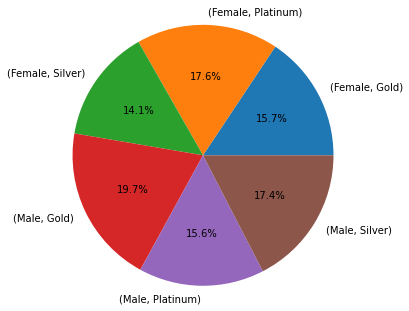

In [98]:

df.groupby(['gender','Segment'])['claim_amount'].sum().plot(kind='pie',
                                                            autopct='%.1f%%',
                                                            ylabel='',
                                                            radius=1.5)
plt.show()

In [99]:
df.groupby(['gender','Segment'])['claim_amount'].sum()

gender  Segment 
Female  Gold        2.110042e+06
        Platinum    2.369720e+06
        Silver      1.897302e+06
Male    Gold        2.655967e+06
        Platinum    2.096443e+06
        Silver      2.347131e+06
Name: claim_amount, dtype: float64

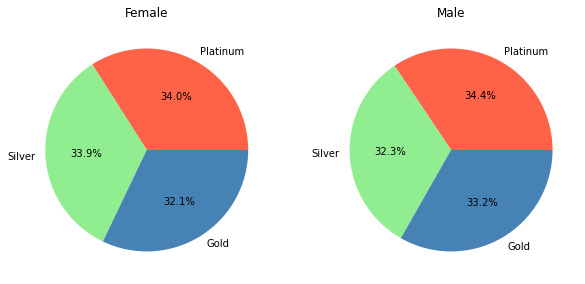

In [100]:
pie = pd.pivot_table(df, index =['Segment'],columns ='gender',values ='claim_amount')

pie.plot(kind='pie', 
            labels=['Platinum','Silver','Gold'],
            colors=['tomato', 'lightgreen', 'steelblue'],
            autopct='%.1f%%', # to get percentage and round off appropriately
            fontsize=10,
            subplots=True,
            figsize=(10,7),ylabel='',title=['Female','Male'],
            legend=0)

plt.show()

#### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

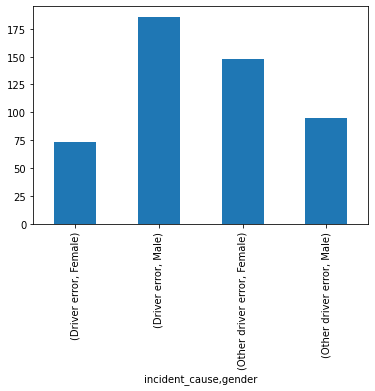

In [101]:
df[df.incident_cause.str.contains('driver',case=False)].groupby(['incident_cause','gender'])['customer_id'].agg('count').plot(kind='bar')
plt.show()

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [102]:
pd.crosstab(df.Age_cat,df.fraudulent)

fraudulent,No,Yes
Age_cat,,
Children,6,2
Youth,245,80
Adult,576,162


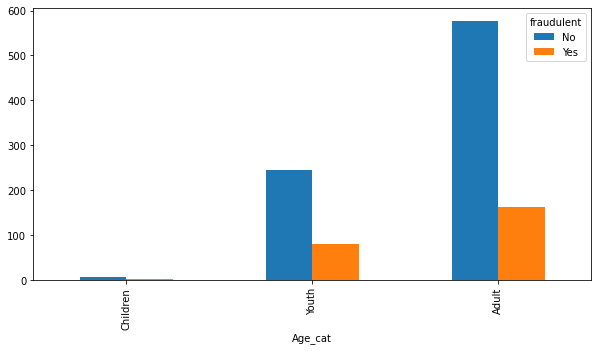

In [103]:
pd.crosstab(df.Age_cat,df.fraudulent).plot(kind='bar',figsize=(10,5))
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed  by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

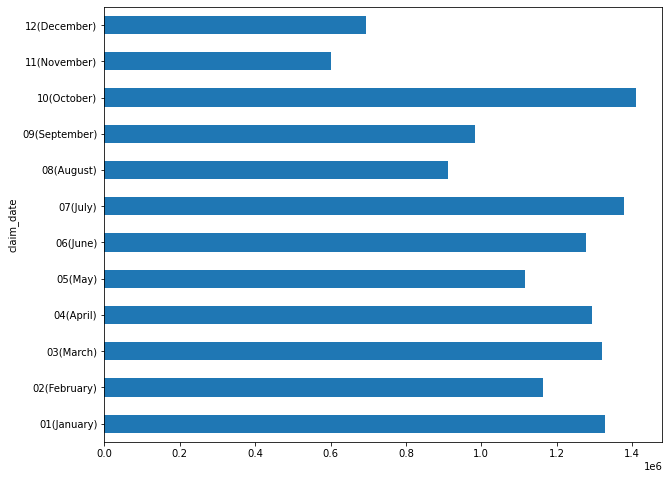

In [104]:
(df.groupby(df.claim_date.dt.strftime('%m(%B)'))['claim_amount'].sum()).sort_index().plot(kind='barh',figsize=(10,8),ylabel='claim_amount')
plt.show()

#### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [105]:
# using panda's plot
qwe=df.pivot_table(index=['Age_cat','gender'],columns='fraudulent',values='claim_amount',aggfunc='mean')

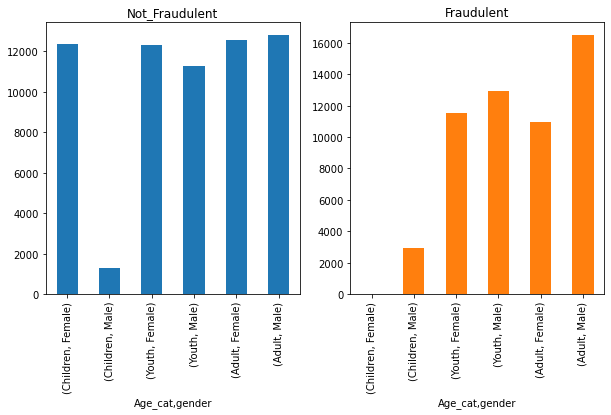

In [106]:
qwe.plot(kind='bar',subplots=True,layout=(1,2),figsize=(10,5),title=['Not_Fraudulent','Fraudulent'],legend=None)
plt.show()

In [107]:
# using seaborn
asd=df.groupby(['Age_cat','gender','fraudulent'])['claim_amount'].sum().reset_index()

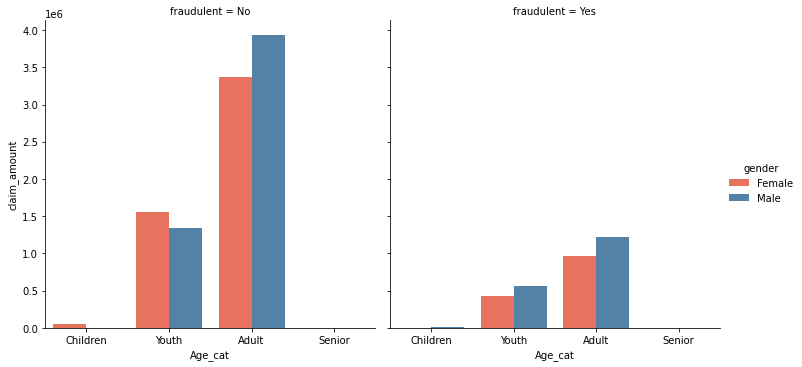

In [108]:
sns.catplot(x='Age_cat',y='claim_amount',hue='gender',data=asd,col='fraudulent',ci=None,kind='bar',palette=['tomato','steelblue'])
plt.show()

### Hypothesis Testing

#### 16 Is there any similarity in the amount claimed by males and females?

In [109]:
## filter the data for male and female customers:

male=df.loc[df.gender=='Male','claim_amount']
female=df.loc[df.gender=='Female','claim_amount']

# display the mean value for male and female customers:
print( 'mean value for Male customers:',round(male.mean(),2) ,'\n',
      'mean value for Female customers:',round(female.mean(),2))

# display the variance value for male and female customers:
print( 'mean value for Male customers:',round(male.var(),2) ,'\n',
      'mean value for Female customers:',round(female.var(),2))

# NOTE: Going with equal variance ttest,not a huge difference  in the two variance.

# # H0: means are same    or  u1 = u2
# Ha: means are not same  or  u1 <> u2
# CI = 95%, p = 0.05

# perform the test
stats.ttest_ind(a=male,b=female)

# based on p values, p value of the test is high compared to cutoff p at 95%; 
# thus we will fail to reject the H0

# business conclusion
# There exist  similarity in the amount claimed by  male and female customers as they are from the same population.

mean value for Male customers: 12884.83 
 mean value for Female customers: 12100.69
mean value for Male customers: 184032586.19 
 mean value for Female customers: 172874276.92


Ttest_indResult(statistic=0.9630529881732622, pvalue=0.3357373087404262)

#### 17. Is there any relationship between age category and segment?

In [110]:
# H0 - No relationship betwwen age category and segment.
# Ha - Relationship exists betwwen age category and segment.

# CI - 95%, p - 0.05

# creating an obs freq table 
obs_fre_tbl=pd.crosstab(df.Segment,df.Age_cat)

# perform the test
stats.chi2_contingency(observed=obs_fre_tbl)

# based on p values, p value of the test is high compared to cutoff p at 95%; 
# thus we will  fail to reject the H0

# business conclusion:
# There exist no relationship between segment and age category  and this claim is made at the CI of 95%

(1.2478676261973547,
 0.8701563875606337,
 4,
 array([[  2.75630252, 111.97478992, 254.26890756],
        [  2.68160598, 108.94024276, 247.37815126],
        [  2.5620915 , 104.08496732, 236.35294118]]))

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [111]:
# mean of the current year claim amount:
print( 'mean of the current year claim amount:',df.claim_amount.mean() , '\n' )

# H0 : u <= 10,000 
# Ha : u > 10,000

# CI = 95%, p = 0.05

# perform the test
print( stats.ttest_1samp(df.claim_amount,popmean=10000) )

# based on p values, p value of the test is small compared to cutoff p at 95%; 
# thus we will reject the H0

# business conclusion
# Current year average claim amounts has increased from the last year value of 10,000.
# Above claim is made at the CI of 95%.

mean of the current year claim amount: 12501.489634748285 

Ttest_1sampResult(statistic=6.146231134929638, pvalue=1.1156022878717526e-09)


#### 19. Is there any difference between age groups and insurance claims?

In [112]:
df.Age_cat.value_counts()

Adult       738
Youth       325
Children      8
Senior        0
Name: Age_cat, dtype: int64

In [113]:
df.Age_cat.nunique()

3

In [119]:
## filter the data for different age category:

adult = df.loc[df.Age_cat=='Adult','total_policy_claims']
youth = df.loc[df.Age_cat=='Youth','total_policy_claims']
children = df.loc[df.Age_cat=='Children','total_policy_claims']

# display the mean value for adult,youth and children age category:
print( 'Avg claims  for adult customers:',round(adult.mean(),2) ,'\n',
       'Avg claims for youth customers:',round(youth.mean(),2),'\n',
       'Avg claims for children customers:',round(children.mean(),2))



# # H0: means are same    or  u1 = u2 =u3
# Ha: means are not same for atleast 1  or  u1 <> u2 <> u3 
# CI = 95%, p = 0.05

# perform the test
stats.f_oneway(adult,youth,children)

# based on p values, p value of the test is high compared to cutoff p at 95%; 
# thus we will fail to reject the H0

# business conclusion
#  Different age groups do not influence  number of insurance claims,claim is made at 95%CI

Avg claims  for adult customers: 1.58 
 Avg claims for youth customers: 1.58 
 Avg claims for children customers: 1.88


F_onewayResult(statistic=0.2648627217555567, pvalue=0.7673616642166381)

####  20. Is there any relationship between total number of policy claims and the claimed amount?

In [115]:
# H0 - No relationship between total number of policy claims and the claimed amount.
# Ha - Relationship exists between total number of policy claims and the claimed amount.
# 
# CI - 95%, p - 0.05

# performing pearson correlation test
stats.pearsonr(df.total_policy_claims,df.claim_amount)

# On the basis of p values, p value of the test is large compared to cutoff p at 95%; 
# fail to reject the null hypothesis.

# business conclusion
# There is weak negative  correlation between  total number of policy claims and the claimed amount.
# This claim is made at the CI of 95%.


(-0.022392720732100045, 0.4626700742269406)